## Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

## Set filenames

In [2]:
test_locations=pd.read_csv("Data/test_locations.csv")
test_customers=pd.read_csv("Data/test_customers.csv")

## Remove customer duplicate info

In [3]:
test_customers.head() #Customer id details

,akeed_customer_id,gender,dob,status,verified,language,created_at,updated_at
0,ICE2DJP,Male,NaN,1,1,EN,2018-02-07 16:45:36,2018-02-07 16:45:36
1,FWNUI71,Male,NaN,1,1,EN,2018-03-22 20:11:47,2018-03-22 20:11:47
2,LRX7BCH,Male,NaN,1,1,EN,2018-04-17 20:01:15,2018-04-17 20:01:15
3,D96DHMD,Male,NaN,1,1,EN,2018-04-29 22:35:52,2018-04-29 22:35:52
4,88Q8Y5V,Male,1997.0,1,1,EN,2018-05-05 12:38:09,2018-05-05 12:38:09


In [4]:
len(test_customers)

9768

In [5]:
test_customers['akeed_customer_id'].value_counts() #There are duplicate values, let's

JGRG3RQ    4
DSJRR66    3
4X2Y51H    3
P4MAWAE    3
II7YY1M    2
          ..
1EZVCXR    1
L5WQ9MF    1
K5MVWOI    1
W6NHMMO    1
LRX7BCH    1
Name: akeed_customer_id, Length: 9753, dtype: int64

In [6]:
# Sort customer file on customer ID and Verified columns in ascending order. Remove duplicates and keep last record that is verified.
test_customers =test_customers.sort_values(by=['akeed_customer_id', 'verified'])
test_customers.drop_duplicates(subset='akeed_customer_id',keep='last',inplace=True)

In [7]:
print(test_customers['akeed_customer_id'].nunique())
print(len(test_customers))

9753
9753


## Customer locations  info

In [8]:
test_locations.head() #details on customer location

,customer_id,location_number,location_type,latitude,longitude
0,Z59FTQD,0,NaN,126.032278,-9.106019
1,0JP29SK,0,Home,0.278709,-78.623847
2,0JP29SK,1,Home,0.124485,-78.605621
3,0JP29SK,2,NaN,-0.113891,-78.577449
4,0JP29SK,3,NaN,-0.848796,0.136726


In [9]:
print(test_locations['customer_id'].value_counts())

T1L5K29    12
PEHRJ52    11
NQJU5X3    10
529ZR7J    10
2U9M7XW     9
           ..
SEABHYA     1
369I4YD     1
5MFILQ6     1
Z88IXKB     1
NQIQASP     1
Name: customer_id, Length: 10000, dtype: int64


In [10]:
print(test_locations['location_number'].value_counts())

0     10000
1      3821
2      1551
3       729
4       336
5       168
6        71
7        26
8        11
9         4
10        2
11        1
Name: location_number, dtype: int64


In [11]:
len(np.unique((test_locations[['customer_id','location_number']].values).astype(str),axis=0))
#The customer id and loc number together have unique values of 59503, the same as the number of rows 

16720

In [12]:
print(test_locations['customer_id'].nunique())
print(len(test_locations))

10000
16720


## Merge customer and locations

In [13]:
cust_loc=pd.merge(test_customers,test_locations,how="right",left_on='akeed_customer_id',right_on='customer_id')
del cust_loc['akeed_customer_id']

In [14]:
cust_loc.head()

,gender,dob,status,verified,language,created_at,updated_at,customer_id,location_number,location_type,latitude,longitude
0,Male,NaN,1.0,1.0,EN,2018-12-19 17:41:20,2018-12-19 17:41:20,000IPH5,0,Home,-0.386541,-78.545227
1,Male,NaN,1.0,1.0,EN,2019-01-29 00:39:28,2019-01-29 00:39:27,002U0H9,0,Work,-1.654883,-78.395332
2,Male,NaN,1.0,1.0,EN,2019-05-14 20:36:32,2019-05-14 20:36:31,00ICGWM,0,NaN,-0.123915,-0.001945
3,Male,NaN,1.0,1.0,EN,2019-05-14 20:36:32,2019-05-14 20:36:31,00ICGWM,1,Home,-0.021965,0.021158
4,NaN,NaN,1.0,1.0,NaN,2020-02-14 15:51:28,2020-02-14 15:53:23,015LTZX,0,NaN,19.216488,3.001413


## Renaming some customer columns for clarity

In [15]:
cust_loc=cust_loc.rename(columns={'latitude':'cust_latitude','longitude':'cust_longitude',
                                  'location_type':'cust_location_type','location_number':'cust_location_number',
                                  'created_at':'cust_created_at','updated_at':'cust_updated_at','status':'cust_status',
                                  'verified':'cust_verified'})

In [16]:
cust_loc.columns.values

array(['gender', 'dob', 'cust_status', 'cust_verified', 'language',
       'cust_created_at', 'cust_updated_at', 'customer_id',
       'cust_location_number', 'cust_location_type', 'cust_latitude',
       'cust_longitude'], dtype=object)

## Lat and long

In [17]:
print(type(cust_loc['cust_latitude'][0]))
print(cust_loc[['cust_latitude', 'cust_longitude']].isnull().sum())
cust_loc[['cust_latitude', 'cust_longitude']]=cust_loc[['cust_latitude', 'cust_longitude']].fillna(0)
print(cust_loc[['cust_latitude', 'cust_longitude']].isnull().sum())
cust_loc[[ 'cust_latitude', 'cust_longitude']]

<class 'numpy.float64'>
cust_latitude     3
cust_longitude    3
dtype: int64
cust_latitude     0
cust_longitude    0
dtype: int64


,cust_latitude,cust_longitude
0,-0.386541,-78.545227
1,-1.654883,-78.395332
2,-0.123915,-0.001945
3,-0.021965,0.021158
4,19.216488,3.001413
...,...,...
16715,-0.328834,0.660301
16716,-0.363342,0.688674
16717,-0.475803,0.082508
16718,-0.696428,0.215438


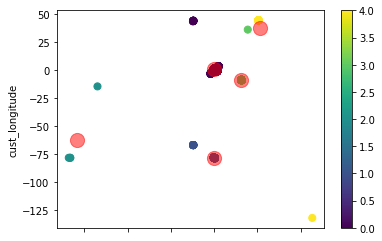

In [18]:
#cluster lat and long
kmeans=KMeans(n_clusters=5,init='k-means++')
kmeans.fit(cust_loc[[ 'cust_latitude', 'cust_longitude']])
cust_loc['loc_cluster_label'] = kmeans.fit_predict(cust_loc[[ 'cust_latitude', 'cust_longitude']])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(cust_loc[[ 'cust_latitude', 'cust_longitude']])
# Full_data['cluster_label'].value_counts()
cust_loc.plot.scatter(x = 'cust_latitude', y = 'cust_longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='r', s=200, alpha=0.5)

In [19]:
cust_loc['loc_cluster_label'].value_counts()

0    10976
1     5404
3      310
4       26
2        4
Name: loc_cluster_label, dtype: int64

## Gender

In [20]:
cust_loc['gender'].unique()

array(['Male', nan, 'Female', 'male', 'Female  ', 'Female ', 'Male  '],
      dtype=object)

In [21]:
def gender(title):
    if title=='Male' or title=='Male  ' or title=='male' :
        return 'male'
    elif title=='Female'  or title=='Female  '  or title=='Female   ' or title=='Female    ' or title=='Female ':
        return 'female'
    else:
        return np.nan

In [22]:
cust_loc['gender']=cust_loc['gender'].apply(gender)

In [23]:
cust_loc['gender'].unique()

array(['male', nan, 'female'], dtype=object)

## Created at

In [24]:
cust_loc['cust_created_at']

0        2018-12-19 17:41:20
1        2019-01-29 00:39:28
2        2019-05-14 20:36:32
3        2019-05-14 20:36:32
4        2020-02-14 15:51:28
                ...         
16715                    NaN
16716                    NaN
16717                    NaN
16718                    NaN
16719                    NaN
Name: cust_created_at, Length: 16720, dtype: object

In [25]:
cust_loc['cust_created_at'].isnull().sum()

403

In [26]:
cust_loc['Date_cust_created_at'] = cust_loc['cust_created_at'].str.split(' ').str[0]


In [27]:
cust_loc['Date_cust_created_at']

0        2018-12-19
1        2019-01-29
2        2019-05-14
3        2019-05-14
4        2020-02-14
            ...    
16715           NaN
16716           NaN
16717           NaN
16718           NaN
16719           NaN
Name: Date_cust_created_at, Length: 16720, dtype: object

In [28]:
cust_loc['Date_cust_created_at'] = pd.to_datetime(cust_loc['Date_cust_created_at'], format='%Y-%m-%d')

In [29]:
print(type(cust_loc['Date_cust_created_at'][0]))
cust_loc['Date_cust_created_at']

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


0       2018-12-19
1       2019-01-29
2       2019-05-14
3       2019-05-14
4       2020-02-14
           ...    
16715          NaT
16716          NaT
16717          NaT
16718          NaT
16719          NaT
Name: Date_cust_created_at, Length: 16720, dtype: datetime64[ns]

In [30]:
Curr_date='2020-07-01'
Curr_date=pd.to_datetime(Curr_date,format='%Y-%m-%d')
print(Curr_date)
print(type(Curr_date))
print(abs(Curr_date-cust_loc['Date_cust_created_at'][0]).days)

2020-07-01 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
560


In [31]:
def days_between(day):
    return (Curr_date-day).days

In [32]:
cust_loc['Cust_created_days']=cust_loc['Date_cust_created_at'].apply(days_between)

In [33]:
cust_loc['Cust_created_days'].isnull().sum()

403

In [34]:
cust_loc.drop(['language','cust_longitude','cust_latitude','cust_updated_at','Date_cust_created_at','cust_created_at'],axis=1,inplace=True)

## One hot encoding

In [35]:
TrainDummy = pd.get_dummies(cust_loc['cust_location_type'], prefix = 'cust_location_type') 
genderDummy=pd.get_dummies(cust_loc['gender'],prefix='gender')
locationDummy=pd.get_dummies(cust_loc['loc_cluster_label'],prefix='cust_lan_long')
del cust_loc['cust_location_type']
del cust_loc['gender']
del cust_loc['loc_cluster_label']
customer = pd.concat([cust_loc,TrainDummy,genderDummy,locationDummy], axis=1)
customer.head()

,dob,cust_status,cust_verified,customer_id,cust_location_number,Cust_created_days,cust_location_type_Home,cust_location_type_Other,cust_location_type_Work,gender_female,gender_male,cust_lan_long_0,cust_lan_long_1,cust_lan_long_2,cust_lan_long_3,cust_lan_long_4
0,NaN,1.0,1.0,000IPH5,0,560.0,1,0,0,0,1,0,1,0,0,0
1,NaN,1.0,1.0,002U0H9,0,519.0,0,0,1,0,1,0,1,0,0,0
2,NaN,1.0,1.0,00ICGWM,0,414.0,0,0,0,0,1,1,0,0,0,0
3,NaN,1.0,1.0,00ICGWM,1,414.0,1,0,0,0,1,1,0,0,0,0
4,NaN,1.0,1.0,015LTZX,0,138.0,0,0,0,0,0,1,0,0,0,0


In [36]:
#convert to csv file
customer.to_csv("test_customers_p1.csv",index=False)